# AGDC Version 2 Requirements till 30 June 2016 10/12/2015

## Summary

A great deal of work has been done by AGDC partners to outline the key requirements and technical approach for the next version of the AGDC (Version 2). For example, the previous Technical Working Group held a workshop that resulted in a draft Preliminary Design Report that has subsequently been translated to the AGDC wiki ( http://datacube.org.au ). Similarly, prototype functionality has been built to test and verify key concepts for a range of components including the netCDF-4 based Storage Units that are managed under NCIfs NERDIP data management, publishing and general access to data protocols; a Generalised Data Framework (GDF) to access the multidimensional Storage Units; and the AGDC Analytic Engine adding support for interactive Exploratory Data Analysis (EDA).

The following requirements for Version 2 have been mainly based off this thinking and documentation. It is important to note that these requirements are for the current development
effort running through till June 30, 2016. They are designed to guide and define the next step in the development of the AGDC, not as the final destination.


Approved Requirements for AGDC Version 2

These requirements were formally approved by the AGDC Programme Board at its meeting on 10
December, 2015.

Patterns of Use:
AGDC Version 2 will support the following patterns of use.

## 1. Routine national scale product generation. Specifically, Version 2 will include national collections of:
    
 Water Observations from Space.

 Intertidal Characterisation.

 Landsat Fractional Cover.

 Pixel Quality.

 NDVI.

Landsat Surface reflectance statistical summaries:

    Seasonal medians; and
    
    Most-up-to-date observation.
    
In some cases, these collections may be virtual, i.e. they are not pre-computed but rather
computed as they are needed.


## 2. A user should be able to interact with these collections through a web browser including:#


Clicking on a pixel and displaying a time series (i.e., pixel drill).



### Spatio-temporal (statistical) summaries that would allow users to easily answer questions such as:
    
    How frequently was water observed over catchment y during time period x; and

    What was the surface reflectance for area x at time y?

## 3. Earth Observation (EO) scientists and allied domain specialists will be able to undertake exploratory data analysis. In general this would mean a user will be able to easily retrieve, investigate, visualise, develop algorithms, test, iterate, visualise results and interpret them in the context of other spatio-temporal datasets.

 A key demonstration of this capability will be the availability of functions and data
structures to enable Landsat/MODIS blending.

### Input data
The AGDC will use the following data collections:
 Landsat: TM, ETM+ and OLI/TIRS.
 MODIS: Collection 6 MOD09 (granule) and MOD43 (sinusoidal tiles) that will provide variables
necessary for the Landsat-MODIS blending algorithm.

In [1]:
%matplotlib inline
import datacube
dc = datacube.Datacube(app='dc-example')
dc
dc.list_products()

,name,description,platform,product_type,instrument,format,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,
1,ls5_satellite_telemetry_data,Landsat 5 Satellite Telemetry Data,LANDSAT_5,satellite_telemetry_data,TM,NaN,NaN,NaN,NaN,NaN
2,ls5_level1_scene,Landsat 5 Level 1 At-sensor Radiance 25 metre,LANDSAT_5,level1,TM,GeoTiff,NaN,NaN,NaN,NaN
3,ls5_nbar_scene,Landsat 5 NBAR 25 metre,LANDSAT_5,nbar,TM,GeoTiff,NaN,NaN,NaN,NaN
4,ls5_nbart_scene,Landsat 5 NBART 25 metre,LANDSAT_5,nbart,TM,GeoTiff,NaN,NaN,NaN,NaN
5,ls5_pq_scene,Landsat 5 PQ 25 metre,LANDSAT_5,pqa,TM,GeoTiff,NaN,NaN,NaN,NaN
6,ls5_nbar_albers,"Landsat 5 Surface Reflectance NBAR 25 metre, 1...",LANDSAT_5,nbar,TM,NetCDF,EPSG:3577,"[-25, 25]","[100000.0, 100000.0]","(y, x)"


It will also include the SRTM 3 second DSM and 1 and 3 second DEMs.

In [2]:
dc.list_measurements()

aliases  dtype  \
product         measurement                               
ls5_nbar_scene  1                 [band_1, blue]  int16   
                2                [band_2, green]  int16   
                3                  [band_3, red]  int16   
                4                  [band_4, nir]  int16   
                5                [band_5, swir1]  int16   
                7                [band_7, swir2]  int16   
ls5_nbart_scene 1                 [band_1, blue]  int16   
                2                [band_2, green]  int16   
                3                  [band_3, red]  int16   
                4                  [band_4, nir]  int16   
                5                [band_5, swir1]  int16   
                7                [band_7, swir2]  int16   
ls5_pq_scene    pqa          [qa_flags, quality]  int16   
ls5_nbar_albers blue              [band_1, blue]  int16   
                green            [band_2, green]  int16   
                red                [band_3, red]  int16   
                nir                [band_4, nir]  int16   
                swir1            [band_5, swir1]  int16   
                swir2            [band_7, swir2]  int16   

                                                              flags_definition  \
product         measurement                                                      
ls5_nbar_scene  1                                                          NaN   
                2                                                          NaN   
                3                                                          NaN   
                4                                                          NaN   
                5                                                          NaN   
                7                                                          NaN   
ls5_nbart_scene 1                                                          NaN   
                2                                                          NaN   
                3                                                          NaN   
                4                                                          NaN   
                5                                                          NaN   
                7                                                          NaN   
ls5_pq_scene    pqa          {u'swir2_saturated': {u'values': {u'1': False,...   
ls5_nbar_albers blue                                                       NaN   
                green                                                      NaN   
                red                                                        NaN   
                nir                                                        NaN   
                swir1                                                      NaN   
                swir2                                                      NaN   

                              name  nodata  \
product         measurement                  
ls5_nbar_scene  1                1    -999   
                2                2    -999   
                3                3    -999   
                4                4    -999   
                5                5    -999   
                7                7    -999   
ls5_nbart_scene 1                1    -999   
                2                2    -999   
                3                3    -999   
                4                4    -999   
                5                5    -999   
                7                7    -999   
ls5_pq_scene    pqa            pqa       0   
ls5_nbar_albers blue          blue    -999   
                green        green    -999   
                red            red    -999   
                nir            nir    -999   
                swir1        swir1    -999   
                swir2        swir2    -999   

                                                           spectral_definition  \
product         measurement  

At a minimum, the Australian implementation of the AGDC will cover all of continental Australia plus a
one tile buffer and the Great Barrier Reef. However, the Boards preference would be for the Version
2 to also cover all Commonwealth Marine Reserves.

In [28]:
import folium
from IPython.display import display
import geopandas
from shapely.geometry import mapping
from shapely.geometry import MultiPolygon
import rasterio
import shapely.geometry
import shapely.ops
from functools import partial
import pyproj
from datacube.model import CRS

In [29]:
def datasets_union(dss):
    return shapely.ops.unary_union([shapely.geometry.Polygon(ds.extent.to_crs(CRS('EPSG:4326')).points) for ds in dss])
    

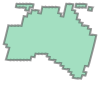

In [31]:
dss = dc.index.datasets.search(product='ls5_pq_scene')
datasets_union(dss)

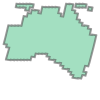

In [32]:
dss = dc.index.datasets.search(product='ls5_nbar_scene')
dataset_footprint = datasets_union(dss)

In [36]:
dss = dc.index.datasets.search(product='ls5_nbar_albers')
datacube_footprint = datasets_union(dss)

In [8]:
def plot_folium(shapes):
    style_function = lambda x: {'fillColor': '#000000' if x['type'] == 'Polygon' else '#00ff00'}
    mapa = folium.Map(location=[-30,150], zoom_start=4)
    poly = folium.features.GeoJson(mapping(shapes), style_function=style_function)
    mapa.add_children(poly)
    display(mapa)

In [34]:
plot_folium(dataset_footprint)

In [35]:
plot_folium(datacube_footprint)

All data collections that are included in the Australian implementation of the AGDC will:
 Have a CC BY Attribution 3.0 or CC BY Attribution 4.0 license. 

In [12]:
!ncdump -h '/g/data/rs0/datacube/002/LS5_TM_NBAR/14_-40/LS5_TM_NBAR_3577_14_-40_20110107234000000000.nc' | grep license

		:license = "CC BY Attribution 4.0 International License" ;


The use of a collection with a
different licence will require approval of the AGDC Programme Board; and
 Be in netCDF 4 format and will comply with relevant CF conventions;.

In [13]:
from __future__ import print_function
import argparse
import sys
from compliance_checker.runner import ComplianceChecker, CheckSuite
from compliance_checker import __version__

ds_loc = '/g/data/rs0/datacube/002/LS5_TM_NBAR/14_-40/LS5_TM_NBAR_3577_14_-40_20110107234000000000.nc'

cs = CheckSuite()
ds = cs.load_dataset(ds_loc)
cs.load_all_available_checkers()
score_groups = cs.run(ds, 'cf')

return_value, errors = ComplianceChecker.run_checker(ds_loc, ['cf','acdd'], 1, 'normal', '-','text')



--------------------------------------------------------------------------------
                     The dataset scored 36 out of 62 points                     
                             during the acdd check                              
--------------------------------------------------------------------------------
                           Verbose Scoring Breakdown:                            

                                 High Priority                                  
--------------------------------------------------------------------------------
    Name                            :Priority: Score
keywords                                :3:     1/1
summary                                 :3:     1/1
title                                   :3:     1/1
varattr                                 :3:    21/30
    blue                                :3:       2/3
        var_std_name                    :3:         1/2
        var_units                       :3:         1/1
 

## Output Products
By June 30, 2016 the Australian implementation of the AGDC will ensure that the products being
produced are supported by and hosted on the RDS.

## Technical Requirements
In line with the use-case patterns outlined above, Version 2 will support:
 Data-fusion and analysis across heterogeneous gridded data collections from different
domains.

In [14]:
albers_grid = dc.load(product='ls5_nbar_albers', 
              x=(149.07, 149.17), y=(-35.25, -35.35), 
              time=('2011-3-1', '2011-6-30'), 
              measurements=['swir2', 'nir', 'blue'], 
              group_by='solar_day', stack='color').transpose('time', 'y', 'x', 'color')
zip(albers_grid.dims, albers_grid.shape)

[('time', 6), ('y', 490), ('x', 420), ('color', 3)]

In [15]:
sinusoidal_grid = dc.load(product='ls5_nbar_albers', 
              x=(149.07, 149.17), y=(-35.25, -35.35), 
              time=('2011-3-1', '2011-6-30'), 
              measurements=['swir2', 'nir', 'blue'], 
              group_by='solar_day', stack='color',
              output_crs='PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",\
                              DATUM["Not specified (based on custom spheroid)",\
                            SPHEROID["Custom spheroid",6371007.181,0]],\
                            PRIMEM["Greenwich",0],\
                            UNIT["degree",0.0174532925199433]],\
                            PROJECTION["Sinusoidal"],\
                            PARAMETER["longitude_of_center",0],\
                            PARAMETER["false_easting",0],\
                            PARAMETER["false_northing",0],\
                            UNIT["Meter",1]]',resolution=(-250,250)).transpose('time', 'y', 'x', 'color')
zip(sinusoidal_grid.dims, sinusoidal_grid.shape)

[('time', 6), ('y', 45), ('x', 104), ('color', 3)]

In [16]:
fake_saturation = 3500
clipped_visible = albers_grid.where(albers_grid<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)

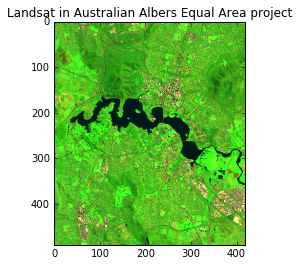

In [17]:
from matplotlib import pyplot as plt
plt.title('Landsat in Australian Albers Equal Area project')
plt.imshow(scaled.isel(time=1))

In [18]:
fake_saturation = 3500
clipped_visible = sinusoidal_grid.where(sinusoidal_grid<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
sinusoidal_scaled = (clipped_visible / max_val)

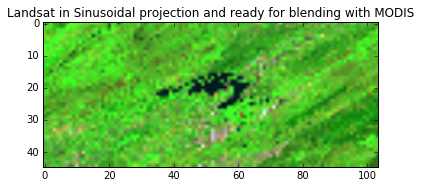

In [19]:
from matplotlib import pyplot as plt
plt.title('Landsat in Sinusoidal projection and ready for blending with MODIS')
plt.imshow(sinusoidal_scaled.isel(time=1))

Tuneable configuration, at ingest, of multidimensional files (eg. chunking, compression type,
dimension depth).

In [20]:
!datacube dataset add --help

Usage: datacube dataset add [OPTIONS] [DATASETS]...

  Add datasets to the Data Cube

Options:
  -r, --match-rules PATH  Rules to be used to associate datasets with products
  -t, --dtype TEXT        Product to be associated with the datasets
  -a, --auto-match        Automatically associate datasets with products by
                          matching metadata
  --dry-run               Check if everything is ok
  -h, --help              Show this message and exit.


## A data retrieval mechanism that provides the ability to:


Obtain seamless subsets of data across storage unit boundaries;


In [21]:
seamless_subset = dc.load(product='ls5_nbar_albers', 
              x=(149.07, 149.17), y=(-35.25, -35.35), 
              time=('2011-3-1', '2011-6-30'), 
              measurements=['swir2', 'nir', 'blue'], 
              group_by='solar_day', stack='color').transpose('time', 'y', 'x', 'color')

seamless_subset_valid_data = dc.index.datasets.search(product='ls5_nbar_albers', 
              x=(149.07, 149.17), y=(-35.25, -35.35), 
              time=('2011-3-1', '2011-6-30'))
parts = []

#for part in seamless_subset:
#    in_crs = part.crs 
#    project = partial(pyproj.transform,pyproj.Proj(init=in_crs),pyproj.Proj(init=out_crs))
#    parts.append(shapely.ops.transform(project, shapely.geometry.Polygon(part.extent.points)))
#shapely.ops.unary_union(parts)


In [22]:
dc_workflow = datacube.api.GridWorkflow()

TypeError: __init__() takes at least 2 arguments (1 given)


Filter data based on observation attribute (for example, pixel quality);

In [ ]:
#pixel quality example

from datacube.api import API, describe_flags, make_mask, list_flag_names
import xarray as xr
dc = API()
CELL = (19, -29)
pqa = dc.get_dataset_by_cell(CELL, product='pqa', platform='LANDSAT_8')
pqa
print(describe_flags(pqa))
print(list_flag_names(pqa))

#Define good pixel
GA_GOOD_PIXEL = {name: False for name in ('band_5_saturated',
 'band_6_1_saturated',
 'cloud_shadow_acca',
 'cloud_fmask',
 'band_3_saturated',
 'band_1_saturated',
 'band_4_saturated',
 'band_2_saturated',
 'cloud_acca',
 'band_6_2_saturated',
 'cloud_shadow_fmask',
 'band_7_saturated')}
GA_GOOD_PIXEL.update(dict(contiguity=True, land_obs=True))

# Make a mask to get only good pixels
good_pixel_mask = make_mask(pqa, **GA_GOOD_PIXEL)
nbar = dc.get_dataset_by_cell(CELL, variables=('band_1', 'band_2', 'band_3'), product='nbar', platform='LANDSAT_8')
nbar_good_pixels = nbar.where(good_pixel_mask)['band_1']

Define the spatio-temporal range of interest independent of data storage unit; and define the specific sensor or combination of sensor data to be analysed.

Define the specific sensor or combination of sensor data to be analysed.

Define the specific sensor or combination of sensor data to be analysed.

In [ ]:
query = {
    'product': 'NBAR',
    'platform': 'LANDSAT_5',
    'variables': ['band_30', 'band_40'],
    'dimensions': {
        'x' : {
            'range': (148.5, 149.5),
            'array_range': (0, 1),
        },
        'y' : {
            'range': (-34.8, -35.8),
            'array_range': (0, 1),
        },
        'time': {
            'range': ((1990, 4, 1), (2020, 5, 1))
        }
    }
}
data = dc.get_data(query)
data.items()


The API will provide a simplified conceptual model for data query and analysis based
on an n-dimensional array abstraction;

During EDA, lazy evaluation of calculations so only those results that are in use are
computed; and

In [ ]:
from datetime import datetime
from datacube.analytics.analytics_engine import AnalyticsEngine
from datacube.execution.execution_engine import ExecutionEngine
from datacube.analytics.utils.analytics_utils import plot
a = AnalyticsEngine()
e = ExecutionEngine()
dimensions = {'x':    {'range': (149.07, 149.18)},
              'y':    {'range': (-35.32, -35.28)},
              'time': {'range': (datetime(1990, 1, 1), datetime(1990,5, 31))}}

band_4 = a.create_array(('LANDSAT_5', 'NBAR'), ['band_40'], dimensions, 'NIR')
band_3 = a.create_array(('LANDSAT_5', 'NBAR'), ['band_30'], dimensions, 'Red')
e.execute_plan(a.plan)
#type(e.cache['NIR'])
plot(e.cache['NIR'])

Support for calculations on arrays that are larger than core memory.

Continental scale product generation will be based off the continental workflows from the
current ADGC v1 API, however it will be modified to use the version 2 data retrieval
mechanism.

The ability to manage results of calculations as a temporary/private data cube for further
analysis.

Web based delivery of products through WMS, WCS, CS/W, OpenDAP services.

In [ ]:
from folium.folium import Map
from IPython.display import HTML


def inline_map(m):
    if isinstance(m, Map):
        m._build_map()
        srcdoc = m.HTML.replace('"', '&quot;')
        embed = HTML('<iframe srcdoc="{srcdoc}" '
                     'style="width: 100%; height: 500px; '
                     'border: none"></iframe>'.format(srcdoc=srcdoc))
    else:
        raise ValueError('{!r} is not a folium Map instance.')
    return embed


Basic provenance that records information about an analysis result/product such as what
datasets, software version, ancillary data and algorithm was used to produce the product.
Wherever possible, Version 2 will adopt and adapt existing software, services and standards.

In [ ]:
!ncdump -v dataset '/g/data/rs0/datacube/002/LS5_TM_NBAR/14_-40/LS5_TM_NBAR_3577_14_-40_20110107234000000000.nc' 

## Other Requirements
### The Project Plan will be supported by:
 A transition plan and timetable for moving AGDC production from Version 1 to Version 2 of
the AGDC (including controlled updates to data collections that are already accessible via
RDS);

A software release and management plan;

A plan for improving the data management of the collections in the RDS Landsat (rs0) and
WOfs (fk4) Projects, such as establishing data layout, appropriate access controls (including
read/write permissions) and alignment to existing organisational data libraries);
 Reformatting of all data in projects rs0 (Landsat) and fk4 (WOfS) that are currently stored in
GeoTIFF into netCDF4-CF;

An AGDC database API which can provide a base for further AGDC developments and that can
accommodate updates in the internal structure of netCDF4-CF;

Upgrading all documentation (including Data Management Plans, Product Specifications, etc.)
and ensuring that any Metadata is compliant with the requirements of the Australian
Government Spatial Data Policies and Directives, the Australian National Data Service and
data.gov.au; and

 




Benchmarks and Quality Assurance tests to validate the quality of the access that is required
by the agreed use-cases.